# EPFL network - School growth over the years 

In [1]:
import json
import pickle
import collections
from BuildGraphModule import *
from unidecode import unidecode
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('paper.json', 'r') as f:
    data = json.load(f)

In [3]:
# Uniform strings - Authors
for i in list(data.keys()):
    try:
        for j in range(len(data[i]['Authors'])):
            t = unidecode(data[i]['Authors'][j])
            t.encode("ascii")
            data[i]['Authors'][j] = t.lower().replace('.','')
            
    except:
        continue

In [4]:
# Uniform strings - EPFL Authors
for i in list(data.keys()):
    dic = []
    try:
        for j in range(len(data[i]['Epfl authors'])):
            string = list(data[i]['Epfl authors'][j].keys())[0]
            t = unidecode(string)
            t.encode("ascii")
            dic += [{t.lower().replace('.','') : list(data[i]['Epfl authors'][j].values())[0]}]
        data[i]['Epfl authors'] = dic
    except:
        continue

In [5]:
data_cut = {}
for paper in list(data.keys()):
    try:
        if int(data[paper]['Publication date']) >= 1993:
            data_cut[paper] = data[paper]
    except:
        continue

In [6]:
# (lab,website)
dict_lab_site = {}
# (lab, num publications)
dict_labs = defaultdict(int)
# (lab, list of papers)
dict_labs_paper = defaultdict(list)
i = 0
for paper in list(data_cut.keys()):
    try:
        if len(data_cut[paper]['Labs involved']) == 1:
            dict_lab_site[list(data_cut[paper]['Labs involved'][0].keys())[0]] = list(data_cut[paper]['Labs involved'][0].values())[0]
            dict_labs[list(data_cut[paper]['Labs involved'][0].keys())[0]] += 1
            dict_labs_paper[list(data_cut[paper]['Labs involved'][0].keys())[0]] += [paper]
            
        else:
            #print ('else')
            for lab in data_cut[paper]['Labs involved']:
                dict_lab_site[list(lab.keys())[0]] = list(lab.values())[0]     
                dict_labs[list(lab.keys())[0]] += 1
                dict_labs_paper[list(lab.keys())[0]] += [paper]
    except:
        continue

In [7]:
dict_labs_paper

defaultdict(list,
            {' IPESE (sci-sti-fm)': ['201977',
              '201975',
              '221587',
              '200097',
              '218377',
              '220321',
              '207635',
              '213225',
              '188157',
              '200099',
              '221586',
              '211900',
              '187611',
              '200098',
              '211903',
              '215087',
              '187067',
              '218004',
              '188156',
              '53505',
              '95835',
              '211901',
              '184934',
              '172036',
              '188153',
              '188138',
              '187614',
              '206778',
              '187723',
              '220206',
              '204803',
              '198704',
              '201852',
              '220217',
              '189839',
              '218949',
              '208829',
              '187783',
              '187536',
              '201973',
 

In [23]:
# Get the list of paper lab and year
dict_lab_years_pub = {}#defaultdict(list)
for lab in dict_labs_paper:
    dict_lab_years_pub[lab] = defaultdict(list)
    for pub in dict_labs_paper[lab]:
        dict_lab_years_pub[lab][data_cut[pub]['Publication date']] += [pub]

In [24]:
dict_lab_years_pub

{' IPESE (sci-sti-fm)': defaultdict(list,
             {'1999': ['220219'],
              '2004': ['53505'],
              '2005': ['63324', '53535'],
              '2006': ['95835'],
              '2007': ['135868', '131175'],
              '2009': ['218390', '133178', '170096'],
              '2010': ['172036'],
              '2011': ['211823'],
              '2012': ['220217', '187783', '188145'],
              '2013': ['188157',
               '187611',
               '187067',
               '188156',
               '184934',
               '188153',
               '188138',
               '187614',
               '187723',
               '189839',
               '187536',
               '189840',
               '187612',
               '188160',
               '185114',
               '188155',
               '190360',
               '187706',
               '188137',
               '187066',
               '218331',
               '188159',
               '187724',
             

In [73]:
dict_author_year = {}
#dict_author_num_year = {}
for lab in dict_lab_years_pub:
    dict_author_year[lab] = defaultdict(list)
    for year in list(dict_lab_years_pub[lab].keys()):
        try:
            dict_author_year[lab][year] += [list(a.keys()) for p in dict_lab_years_pub[lab][year] for a in data_cut[p]['Epfl authors']]
        except:
            dict_author_year[lab][year] += []
            continue
    for year in list(dict_lab_years_pub[lab].keys()):
        list_authors = [i[0] for i in dict_author_year[lab][year]]
        dict_author_year[lab][year] = len(set(list_authors))

In [74]:
dict_author_year

{' IPESE (sci-sti-fm)': defaultdict(list,
             {'1999': 0,
              '2004': 2,
              '2005': 6,
              '2006': 2,
              '2007': 5,
              '2009': 4,
              '2010': 2,
              '2011': 1,
              '2012': 0,
              '2013': 32,
              '2014': 22,
              '2015': 0,
              '2016': 0,
              'year': 0}),
 ' Prof. Tang Group': defaultdict(list,
             {'2009': 1,
              '2010': 0,
              '2011': 1,
              '2012': 1,
              '2013': 0,
              '2014': 1,
              '2015': 1,
              '2016': 0,
              'year': 0}),
 ' Programmable Biomaterials Laboratory': defaultdict(list,
             {'2010': 1, '2012': 0, '2013': 0, '2014': 0, 'year': 0}),
 'ANA': defaultdict(list,
             {'1993': 1,
              '1994': 1,
              '1995': 1,
              '1996': 1,
              '1997': 1,
              '1999': 1,
              '2000': 1,
     

In [75]:
# Get the dictionary (lab, dict(year, number of papers))
dict_lab_years = defaultdict(list)
for lab in dict_labs_paper:
    for pub in dict_labs_paper[lab]:
        dict_lab_years[lab] += [data_cut[pub]['Publication date']]
    dict_lab_years[lab] = collections.Counter(dict_lab_years[lab])
    #dict_lab_years[lab]['Total'] = sum(list(dict_lab_years[lab].values()))

In [76]:
dict_lab_years

defaultdict(list,
            {' IPESE (sci-sti-fm)': Counter({'1999': 1,
                      '2004': 1,
                      '2005': 2,
                      '2006': 1,
                      '2007': 2,
                      '2009': 3,
                      '2010': 1,
                      '2011': 1,
                      '2012': 3,
                      '2013': 33,
                      '2014': 21,
                      '2015': 22,
                      '2016': 15}),
             ' Prof. Tang Group': Counter({'2009': 1,
                      '2010': 2,
                      '2011': 1,
                      '2012': 2,
                      '2013': 1,
                      '2014': 1,
                      '2015': 1,
                      '2016': 1}),
             ' Programmable Biomaterials Laboratory': Counter({'2010': 1,
                      '2012': 1,
                      '2013': 1,
                      '2014': 1}),
             'ANA': Counter({'1993': 3,
                      

In [77]:
# Get dictionary (lab,school)
def school_lab(dict_lab_site, name_school):
    
    school = pickle.load(open(name_school + '.p', 'rb')) # Recall 
    lab_school = {}
    for i in list(dict_lab_site.keys()):
        for nodes in list(school.keys()):
            list_node = school[nodes]
            if i in list_node:
                lab_school[i] = name_school
                break
            else:
                continue   
    
    return lab_school

In [78]:
def school_publication(school, name_school, dict_lab_years, dict_school_pub):
    
    # Get dictionary (school, dict(year,list numb papers))
    
    dict_school_pub[name_school] = defaultdict(list)
    for lab in school:   
        for year in list(dict_lab_years[lab].keys()):
            dict_school_pub[school[lab]][year] += [dict_lab_years[lab][year]]
            
    for year in dict_school_pub[name_school]:
        dict_school_pub[name_school][year] = sum(dict_school_pub[name_school][year])

    return dict_school_pub

In [79]:
def school_author(school, name_school, dict_author_year, dict_school_pub):
    
    # Get dictionary (school, dict(year,list numb papers))
    
    dict_school_pub[name_school] = defaultdict(list)
    for lab in school:   
        for year in list(dict_author_year[lab].keys()):
            dict_school_pub[school[lab]][year] += [dict_author_year[lab][year]]
            
    for year in dict_school_pub[name_school]:
        dict_school_pub[name_school][year] = sum(dict_school_pub[name_school][year])

    return dict_school_pub

In [80]:
list_schools = ['ENAC', 'SB', 'IC', 'STI', 'SV']
dict_school_pub = {}
dict_school_authors = {}

In [81]:
for school in list_schools:
    sc_labs = school_lab(dict_lab_site, school)
    dict_school_pub = school_publication(sc_labs, school, dict_lab_years, dict_school_pub)

In [103]:
dict_school_pub

{'ENAC': defaultdict(list,
             {'1993': 85,
              '1994': 150,
              '1995': 122,
              '1996': 163,
              '1997': 147,
              '1998': 197,
              '1999': 244,
              '2000': 272,
              '2001': 288,
              '2002': 372,
              '2003': 379,
              '2004': 467,
              '2005': 584,
              '2006': 633,
              '2007': 707,
              '2008': 701,
              '2009': 778,
              '2010': 714,
              '2011': 750,
              '2012': 731,
              '2013': 876,
              '2014': 920,
              '2015': 887,
              '2016': 572,
              'year': []}),
 'IC': defaultdict(list,
             {'1993': 53,
              '1994': 63,
              '1995': 84,
              '1996': 117,
              '1997': 145,
              '1998': 180,
              '1999': 185,
              '2000': 170,
              '2001': 177,
              '2002': 215,
      

In [83]:
for school in list_schools:
    sc_labs = school_lab(dict_lab_site, school)
    dict_school_authors = school_author(sc_labs, school, dict_author_year, dict_school_authors)

In [84]:
dict_school_authors

{'ENAC': defaultdict(list,
             {'1993': 26,
              '1994': 32,
              '1995': 20,
              '1996': 41,
              '1997': 23,
              '1998': 37,
              '1999': 45,
              '2000': 41,
              '2001': 57,
              '2002': 65,
              '2003': 84,
              '2004': 80,
              '2005': 82,
              '2006': 76,
              '2007': 91,
              '2008': 94,
              '2009': 104,
              '2010': 138,
              '2011': 233,
              '2012': 212,
              '2013': 212,
              '2014': 253,
              '2015': 180,
              '2016': 80,
              'year': 0}),
 'IC': defaultdict(list,
             {'1993': 18,
              '1994': 15,
              '1995': 16,
              '1996': 22,
              '1997': 20,
              '1998': 23,
              '1999': 24,
              '2000': 37,
              '2001': 66,
              '2002': 51,
              '2003': 65,
    

In [92]:
# Compute the ratio between number of total paper each year/number of authors
ratio_productivity = {}
for school in list_schools:
    ratio_productivity[school] = {}
    for year in list(dict_school_authors[school].keys()):
        try:
            ratio_productivity[school][year] = dict_school_pub[school][year]/dict_school_authors[school][year]
        except:
            continue
            

In [93]:
ratio_productivity

{'ENAC': {'1993': 3.269230769230769,
  '1994': 4.6875,
  '1995': 6.1,
  '1996': 3.975609756097561,
  '1997': 6.391304347826087,
  '1998': 5.324324324324325,
  '1999': 5.4222222222222225,
  '2000': 6.634146341463414,
  '2001': 5.052631578947368,
  '2002': 5.723076923076923,
  '2003': 4.511904761904762,
  '2004': 5.8375,
  '2005': 7.121951219512195,
  '2006': 8.328947368421053,
  '2007': 7.769230769230769,
  '2008': 7.457446808510638,
  '2009': 7.480769230769231,
  '2010': 5.173913043478261,
  '2011': 3.218884120171674,
  '2012': 3.44811320754717,
  '2013': 4.132075471698113,
  '2014': 3.6363636363636362,
  '2015': 4.927777777777778,
  '2016': 7.15},
 'IC': {'1993': 2.9444444444444446,
  '1994': 4.2,
  '1995': 5.25,
  '1996': 5.318181818181818,
  '1997': 7.25,
  '1998': 7.826086956521739,
  '1999': 7.708333333333333,
  '2000': 4.594594594594595,
  '2001': 2.6818181818181817,
  '2002': 4.215686274509804,
  '2003': 4.2,
  '2004': 5.40625,
  '2005': 4.426666666666667,
  '2006': 3.3118279569

TypeError: unorderable types: list() < int()

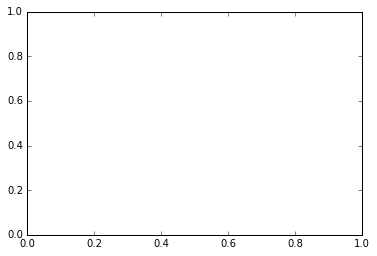

In [102]:
plt.bar(dict_school_pub['IC'].keys(), dict_school_pub['IC'].values(), 0.5, color='violet')

In [101]:
dict_school_pub['SB'].keys()

dict_keys(['2002', '2014', '2012', '2007', '2011', '1999', '1996', '1997', '2010', 'year', '2004', '2001', '1998', '2006', '2005', '2016', '2013', '1994', '2008', '2000', '2015', '2009', '1993', '1995', '2003'])

<Container object of 24 artists>

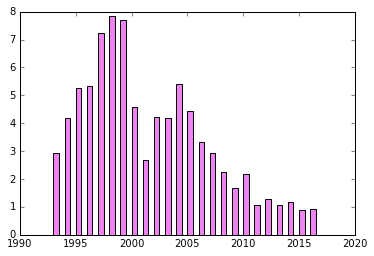

In [94]:
plt.bar(ratio_productivity['IC'].keys(), ratio_productivity['IC'].values(), 0.5, color='violet')


<Container object of 25 artists>

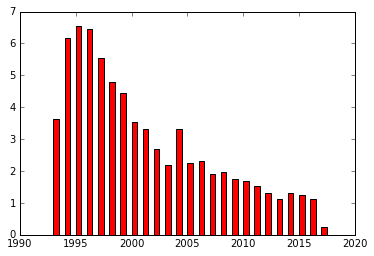

In [97]:
plt.bar(ratio_productivity['STI'].keys(), ratio_productivity['STI'].values(), 0.5, color='r')

